In [1]:
import numpy as np
import random
from itertools import permutations 
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn
import copy
import warnings
warnings.filterwarnings('ignore')

### Imitation Trials

#### Calculates sequence of comparisons, whether they swap and number of least necessary comparisons for any array

In [2]:
#calculates sequence of comparisons, whether they swap and number of least necessary comparisons for an array with a certain order (for example: 6 4 3 1 5 2)
#_f means forward and _b means backward
def imit_seq(array):
    aa=copy.copy(array)
    comp_seq=[]
    swap_or_not=[]
    ii_f=0
    nn=0
    while nn<30:
        
        if aa[ii_f]<aa[ii_f+1]: #correct ofer and keep going forward
            comp_seq.append([ii_f,ii_f+1])
            swap_or_not.append(0)
            nn+=1
            ii_f+=1
        else: #switch when going forward
            comp_seq.append([ii_f,ii_f+1])
            aa[ii_f],aa[ii_f+1]=aa[ii_f+1],aa[ii_f]
            swap_or_not.append(1)
            nn+=1

            ii_b=ii_f
            ii_f+=1

            while nn<30:
                if ii_b==0: #back to position zero
                    break
                if aa[ii_b-1]>aa[ii_b]: #switch and keep going back
                    comp_seq.append([ii_b-1,ii_b])
                    swap_or_not.append(1)
                    aa[ii_b-1],aa[ii_b]=aa[ii_b],aa[ii_b-1]
                    nn+=1
                    ii_b-=1
                if aa[ii_b-1]<aa[ii_b]: #stop going back
                    if ii_b==0:
                        break
                    else:
                        comp_seq.append([ii_b-1,ii_b])
                        swap_or_not.append(0)
                        nn+=1
                        break
        if (aa==np.array(range(1, len(array)+1, 1))).all():
            if np.array([len(array)-2,len(array)-1]) in np.array(comp_seq):
                break
    return array,nn,comp_seq,swap_or_not




# #verify n_nece_compare
# arr_test=np.array([6,4,3,1,5,2]) #13
arr_test=np.array([1, 2, 3, 4, 8, 7, 6, 5])
# arr_test=np.array([2,1,4,3,6,5]) #7
# arr_test=np.array([4,6,3,2,5,1]) #13

print(imit_seq(arr_test))

(array([1, 2, 3, 4, 8, 7, 6, 5]), 13, [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [3, 4], [5, 6], [4, 5], [3, 4], [6, 7], [5, 6], [4, 5], [3, 4]], [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0])


#### Relation between number of comparison and number of swap for gnome sort

<built-in method values of dict object at 0x0000022958E43E00>
<built-in method values of dict object at 0x0000022959549F40>


Text(0, 0.5, 'least necessary number of swap')

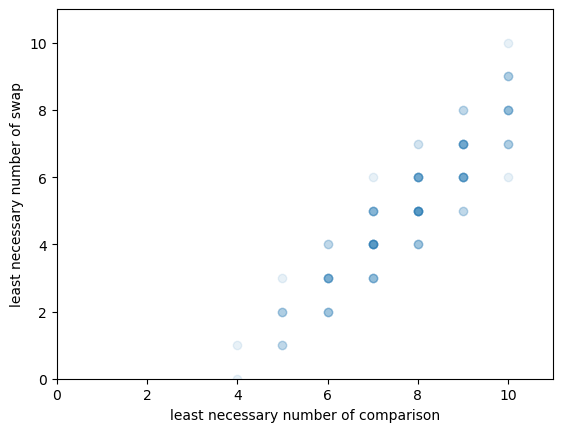

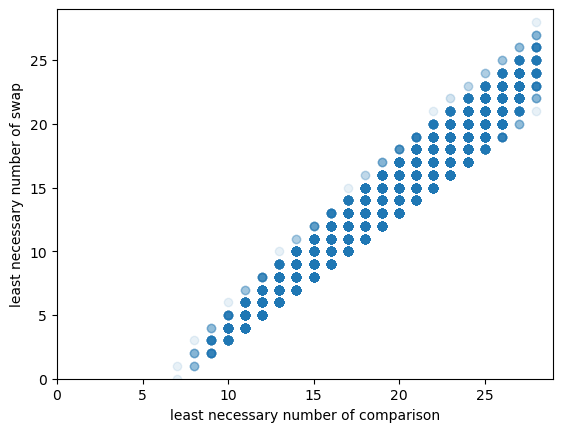

In [18]:
array_5=[1,2,3,4,5]
pp_5 = permutations(array_5)
comp_swap_5={}
for ii in list(pp_5):
        array,nn,comp_seq,swap_or_not=imit_seq(np.array(ii))
        array_str=''.join(str(x) for x in array)
        if array_str not in comp_swap_5.keys():
            comp_swap_5[array_str]=[nn,sum(swap_or_not)]
        else:
            comp_swap_5[array_str]=[nn,sum(swap_or_not)]
print(comp_swap_5.values)
x=[elem[0] for elem in comp_swap_5.values()]
y=[elem[1] for elem in comp_swap_5.values()]
plt.scatter(x, y,alpha=.1)  # alpha for duplicate points
plt.xlim(0, 11)
plt.ylim(0, 11)
plt.xlabel('least necessary number of comparison')
plt.ylabel('least necessary number of swap')

array_8=[1,2,3,4,5,6,7,8]
pp_8 = permutations(array_8)
comp_swap_8={}
for ii in list(pp_8):
        array,nn,comp_seq,swap_or_not=imit_seq(np.array(ii))
        array_str=''.join(str(x) for x in array)
        if array_str not in comp_swap_8.keys():
            comp_swap_8[array_str]=[nn,sum(swap_or_not)]
        else:
            comp_swap_8[array_str]=[nn,sum(swap_or_not)]
print(comp_swap_8.values)
x=[elem[0] for elem in comp_swap_8.values()]
y=[elem[1] for elem in comp_swap_8.values()]
plt.figure()
plt.scatter(x, y,alpha=.1) # alpha for duplicate points
plt.xlim(0, 29)
plt.ylim(0, 29)
plt.xlabel('least necessary number of comparison')
plt.ylabel('least necessary number of swap')



#### Dictionary of number of necessary comparisons

In [3]:
# find the order with highest number of necessary comparisons
def most_comp(array):
    p = permutations(array)

    n_comp=[]
    all_comp=[]
    comp_dict={}
    for ii in list(p):
        # print(ii)
        all_comp.append(np.array(ii))
        array,nn,comp_seq,swap_or_not=imit_seq(np.array(ii))
        n_comp.append(nn)
        if nn not in comp_dict.keys():
            comp_dict[nn]=[list(ii)]
        else:
            # print(np.array(ii))
            ss=comp_dict[nn]
            ss.append(list(ii))
            comp_dict[nn]=ss

    # max_comp=np.max(n_comp)
    # max_index=np.argmax(n_comp)
    # max_order=all_comp[max_index]

    # half_comp=round(max_comp*0.5)
    # half_index=n_comp.index(half_comp)
    # half_order=all_comp[half_index]

    comp_dict=dict(sorted(comp_dict.items()))
    return comp_dict
    # return max_comp,max_order,half_comp,half_order

#For array with five elements
arr_Test=np.array([1,2,3,4,5])
comp_dict_5=most_comp(arr_Test)
for key, value in comp_dict_5.items():
        print(f"{key}: {value}")


#For array with eight elements
arr_Test=np.array([1,2,3,4,5,6,7,8])
comp_dict_8=most_comp(arr_Test)
for key, value in comp_dict_8.items():
        print(f"{key}: {value}")


4: [[1, 2, 3, 4, 5], [2, 1, 3, 4, 5]]
5: [[1, 2, 3, 5, 4], [1, 2, 4, 3, 5], [1, 3, 2, 4, 5], [2, 1, 3, 5, 4], [2, 1, 4, 3, 5], [2, 3, 1, 4, 5], [3, 1, 2, 4, 5], [3, 2, 1, 4, 5]]
6: [[1, 2, 4, 5, 3], [1, 2, 5, 3, 4], [1, 3, 2, 5, 4], [1, 3, 4, 2, 5], [1, 4, 2, 3, 5], [2, 1, 4, 5, 3], [2, 1, 5, 3, 4], [2, 3, 1, 5, 4], [2, 3, 4, 1, 5], [2, 4, 1, 3, 5], [3, 1, 2, 5, 4], [3, 1, 4, 2, 5], [3, 2, 1, 5, 4], [3, 2, 4, 1, 5], [4, 1, 2, 3, 5], [4, 2, 1, 3, 5]]
7: [[1, 2, 5, 4, 3], [1, 3, 4, 5, 2], [1, 3, 5, 2, 4], [1, 4, 2, 5, 3], [1, 4, 3, 2, 5], [1, 5, 2, 3, 4], [2, 1, 5, 4, 3], [2, 3, 4, 5, 1], [2, 3, 5, 1, 4], [2, 4, 1, 5, 3], [2, 4, 3, 1, 5], [2, 5, 1, 3, 4], [3, 1, 4, 5, 2], [3, 1, 5, 2, 4], [3, 2, 4, 5, 1], [3, 2, 5, 1, 4], [3, 4, 1, 2, 5], [3, 4, 2, 1, 5], [4, 1, 2, 5, 3], [4, 1, 3, 2, 5], [4, 2, 1, 5, 3], [4, 2, 3, 1, 5], [4, 3, 1, 2, 5], [4, 3, 2, 1, 5], [5, 1, 2, 3, 4], [5, 2, 1, 3, 4]]
8: [[1, 3, 5, 4, 2], [1, 4, 3, 5, 2], [1, 4, 5, 2, 3], [1, 5, 2, 4, 3], [1, 5, 3, 2, 4], [2, 3, 5, 4

#### Generate learning examples based on #comparison

In [23]:
#Generate four practice trials for G0
#pseudo random select one from 5-image-4-comparison, 5-image-6-comparison, 5-image-10-comparison, 8-image-7-comparison, 8-image-14-comparison, 8-image-21-comparison
random.seed(10)

p_intro_index=random.randrange(0, len(comp_dict_5[10]), 1)

p1_index=random.randrange(0, len(comp_dict_5[4]), 1)
p2_index=random.randrange(0, len(comp_dict_5[6]), 1)
p3_index=random.randrange(0, len(comp_dict_5[10]), 1)
p4_index=random.randrange(0, len(comp_dict_8[7]), 1)
p5_index=random.randrange(0, len(comp_dict_8[14]), 1)
p6_index=random.randrange(0, len(comp_dict_8[21]), 1)
p1=comp_dict_5[4][p1_index]
p2=comp_dict_5[6][p2_index]
p3=comp_dict_5[10][p3_index]
p4=comp_dict_8[7][p4_index]
p5=comp_dict_8[14][p5_index]
p6=comp_dict_8[21][p6_index]
print(p1,p2,p3,p4,p5,p6)

p1_copy,p1_n_comp,p1_comp_seq,p1_swap=imit_seq(np.array(p1))
p2_copy,p2_n_comp,p2_comp_seq,p2_swap=imit_seq(np.array(p2))
p3_copy,p3_n_comp,p3_comp_seq,p3_swap=imit_seq(np.array(p3))
p4_copy,p4_n_comp,p4_comp_seq,p4_swap=imit_seq(np.array(p4))
p5_copy,p5_n_comp,p5_comp_seq,p5_swap=imit_seq(np.array(p5))
p6_copy,p6_n_comp,p6_comp_seq,p6_swap=imit_seq(np.array(p6))
print(p1_copy,p1_n_comp,p1_comp_seq,p1_swap)
print(p2_copy,p2_n_comp,p2_comp_seq,p2_swap)
print(p3_copy,p3_n_comp,p3_comp_seq,p3_swap)
print(p4_copy,p4_n_comp,p4_comp_seq,p4_swap)
print(p5_copy,p5_n_comp,p5_comp_seq,p5_swap)
print(p6_copy,p6_n_comp,p6_comp_seq,p6_swap)


[4, 2, 3, 5, 1] [2, 5, 4, 3, 1] [2, 1, 3, 4, 5, 6, 7, 8] [3, 5, 4, 1, 2, 6, 8, 7]
[4 2 3 5 1] 8 [[0, 1], [1, 2], [0, 1], [2, 3], [3, 4], [2, 3], [1, 2], [0, 1]] [1, 1, 0, 0, 1, 1, 1, 1]
[2 5 4 3 1] 10 [[0, 1], [1, 2], [0, 1], [2, 3], [1, 2], [0, 1], [3, 4], [2, 3], [1, 2], [0, 1]] [0, 1, 0, 1, 1, 0, 1, 1, 1, 1]
[2 1 3 4 5 6 7 8] 7 [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]] [1, 0, 0, 0, 0, 0, 0]
[3 5 4 1 2 6 8 7] 14 [[0, 1], [1, 2], [0, 1], [2, 3], [1, 2], [0, 1], [3, 4], [2, 3], [1, 2], [0, 1], [4, 5], [5, 6], [6, 7], [5, 6]] [0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0]


#### Dictionary of number of swaps

In [4]:
# find the order with highest number of swaps
def most_swap(array):
    p = permutations(array)

    n_swap=[]
    all_swap=[]
    n_swap_dict={}
    for ii in list(p):
        # print(ii)
        all_swap.append(np.array(ii))
        array,nn,comp_seq,swap_or_not=imit_seq(np.array(ii))
        n_swap_cache=sum(swap_or_not)
        n_swap.append(n_swap_cache)
        if n_swap_cache not in n_swap_dict.keys():
            n_swap_dict[n_swap_cache]=[list(ii)]
        else:
            # print(np.array(ii))
            ss=n_swap_dict[n_swap_cache]
            ss.append(list(ii))
            n_swap_dict[n_swap_cache]=ss

    
    n_swap_dict=dict(sorted(n_swap_dict.items()))
    return n_swap_dict
    # return max_comp,max_order,half_comp,half_order

#For array with five elements
arr_Test=np.array([1,2,3,4,5])
n_swap_dict_5=most_swap(arr_Test)
for key, value in n_swap_dict_5.items():
        print(f"{key}: {value}")


#For array with eight elements
arr_Test=np.array([1,2,3,4,5,6,7,8])
n_swap_dict_8=most_swap(arr_Test)
for key, value in n_swap_dict_8.items():
        print(f"{key}: {value}")

0: [[1, 2, 3, 4, 5]]
1: [[1, 2, 3, 5, 4], [1, 2, 4, 3, 5], [1, 3, 2, 4, 5], [2, 1, 3, 4, 5]]
2: [[1, 2, 4, 5, 3], [1, 2, 5, 3, 4], [1, 3, 2, 5, 4], [1, 3, 4, 2, 5], [1, 4, 2, 3, 5], [2, 1, 3, 5, 4], [2, 1, 4, 3, 5], [2, 3, 1, 4, 5], [3, 1, 2, 4, 5]]
3: [[1, 2, 5, 4, 3], [1, 3, 4, 5, 2], [1, 3, 5, 2, 4], [1, 4, 2, 5, 3], [1, 4, 3, 2, 5], [1, 5, 2, 3, 4], [2, 1, 4, 5, 3], [2, 1, 5, 3, 4], [2, 3, 1, 5, 4], [2, 3, 4, 1, 5], [2, 4, 1, 3, 5], [3, 1, 2, 5, 4], [3, 1, 4, 2, 5], [3, 2, 1, 4, 5], [4, 1, 2, 3, 5]]
4: [[1, 3, 5, 4, 2], [1, 4, 3, 5, 2], [1, 4, 5, 2, 3], [1, 5, 2, 4, 3], [1, 5, 3, 2, 4], [2, 1, 5, 4, 3], [2, 3, 4, 5, 1], [2, 3, 5, 1, 4], [2, 4, 1, 5, 3], [2, 4, 3, 1, 5], [2, 5, 1, 3, 4], [3, 1, 4, 5, 2], [3, 1, 5, 2, 4], [3, 2, 1, 5, 4], [3, 2, 4, 1, 5], [3, 4, 1, 2, 5], [4, 1, 2, 5, 3], [4, 1, 3, 2, 5], [4, 2, 1, 3, 5], [5, 1, 2, 3, 4]]
5: [[1, 4, 5, 3, 2], [1, 5, 3, 4, 2], [1, 5, 4, 2, 3], [2, 3, 5, 4, 1], [2, 4, 3, 5, 1], [2, 4, 5, 1, 3], [2, 5, 1, 4, 3], [2, 5, 3, 1, 4], [3, 1, 

#### Generate learning examples based on #swaps

In [21]:
#Generate six practice trials for G0
#pseudo random select one from 5-image-1-swaps (least), 5-image-4-swaps (somehow), 5-image-10-swaps (most), 8-image-1-swaps, 8-image-10-swaps, 8-image-19-swaps
random.seed(10)

p_intro_index=random.randrange(0, len(n_swap_dict_5[10]), 1)

p1_index=random.randrange(0, len(n_swap_dict_5[1]), 1)
p2_index=random.randrange(0, len(n_swap_dict_5[4]), 1)
p3_index=random.randrange(0, len(n_swap_dict_5[10]), 1)
p4_index=random.randrange(0, len(n_swap_dict_8[1]), 1)
p5_index=random.randrange(0, len(n_swap_dict_8[10]), 1)
p6_index=random.randrange(0, len(n_swap_dict_8[19]), 1)
p1=n_swap_dict_5[1][p1_index]
p2=n_swap_dict_5[4][p2_index]
p3=n_swap_dict_5[10][p3_index]
p4=n_swap_dict_8[1][p4_index]
p5=n_swap_dict_8[10][p5_index]
p6=n_swap_dict_8[19][p6_index]
print(p1,p2,p3,p4,p5,p6)

p1_copy,p1_n_comp,p1_comp_seq,p1_swap=imit_seq(np.array(p1))
p2_copy,p2_n_comp,p2_comp_seq,p2_swap=imit_seq(np.array(p2))
p3_copy,p3_n_comp,p3_comp_seq,p3_swap=imit_seq(np.array(p3))
p4_copy,p4_n_comp,p4_comp_seq,p4_swap=imit_seq(np.array(p4))
p5_copy,p5_n_comp,p5_comp_seq,p5_swap=imit_seq(np.array(p5))
p6_copy,p6_n_comp,p6_comp_seq,p6_swap=imit_seq(np.array(p6))
print(p1_copy,p1_n_comp,p1_comp_seq,p1_swap)
print(p2_copy,p2_n_comp,p2_comp_seq,p2_swap)
print(p3_copy,p3_n_comp,p3_comp_seq,p3_swap)
print(p4_copy,p4_n_comp,p4_comp_seq,p4_swap)
print(p5_copy,p5_n_comp,p5_comp_seq,p5_swap)
print(p6_copy,p6_n_comp,p6_comp_seq,p6_swap)



[2, 1, 3, 4, 5] [3, 4, 1, 2, 5] [5, 4, 3, 2, 1] [1, 2, 3, 4, 5, 7, 6, 8] [4, 6, 3, 1, 2, 5, 8, 7] [8, 5, 2, 6, 7, 3, 1, 4]
[2 1 3 4 5] 4 [[0, 1], [1, 2], [2, 3], [3, 4]] [1, 0, 0, 0]
[3 4 1 2 5] 7 [[0, 1], [1, 2], [0, 1], [2, 3], [1, 2], [0, 1], [3, 4]] [0, 1, 1, 1, 1, 0, 0]
[5 4 3 2 1] 10 [[0, 1], [1, 2], [0, 1], [2, 3], [1, 2], [0, 1], [3, 4], [2, 3], [1, 2], [0, 1]] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1 2 3 4 5 7 6 8] 8 [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [4, 5], [6, 7]] [0, 0, 0, 0, 0, 1, 0, 0]
[4 6 3 1 2 5 8 7] 15 [[0, 1], [1, 2], [0, 1], [2, 3], [1, 2], [0, 1], [3, 4], [2, 3], [1, 2], [0, 1], [4, 5], [3, 4], [5, 6], [6, 7], [5, 6]] [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0]
[8 5 2 6 7 3 1 4] 23 [[0, 1], [1, 2], [0, 1], [2, 3], [1, 2], [3, 4], [2, 3], [4, 5], [3, 4], [2, 3], [1, 2], [0, 1], [5, 6], [4, 5], [3, 4], [2, 3], [1, 2], [0, 1], [6, 7], [5, 6], [4, 5], [3, 4], [2, 3]] [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


### Teaching Block
#### Practice trial based on number of comparison

In [5]:
#pools for teaching demonstration trials
#pseudo random select four from 5-image-4-comparison (min), 5-image-6-comparison, 5-image-8-comparison, 5-image-10-comparison (max), 8-image-7-comparison (min), 8-image-14-comparison, 8-image-21-comparison, 8-image-28-comparison (max)
random.seed(10)


d5_1_index=random.sample(range(0, len(comp_dict_5[4])), 2)+random.sample(range(0, len(comp_dict_5[4])), 2)
d5_2_index=random.sample(range(0, len(comp_dict_5[6])), 4)
d5_3_index=random.sample(range(0, len(comp_dict_5[8])), 4)
d5_4_index=random.sample(range(0, len(comp_dict_5[10])), 4)
d5_1=[comp_dict_5[4][tt] for tt in d5_1_index]
d5_2=[comp_dict_5[6][tt] for tt in d5_2_index]
d5_3=[comp_dict_5[8][tt] for tt in d5_3_index]
d5_4=[comp_dict_5[10][tt] for tt in d5_4_index]
print(d5_1)
print(d5_2)
print(d5_3)
print(d5_4)

d8_1_index=random.sample(range(0, len(comp_dict_8[7])), 2)+random.sample(range(0, len(comp_dict_8[7])), 2)
d8_2_index=random.sample(range(0, len(comp_dict_8[14])), 4)
d8_3_index=random.sample(range(0, len(comp_dict_8[21])), 4)
d8_4_index=random.sample(range(0, len(comp_dict_8[28])), 4)

d8_1=[comp_dict_8[7][tt] for tt in d8_1_index]
d8_2=[comp_dict_8[14][tt] for tt in d8_2_index]
d8_3=[comp_dict_8[21][tt] for tt in d8_3_index]
d8_4=[comp_dict_8[28][tt] for tt in d8_4_index]

print(d8_1)
print(d8_2)
print(d8_3)
print(d8_4)

[[1, 2, 3, 4, 5], [2, 1, 3, 4, 5], [2, 1, 3, 4, 5], [1, 2, 3, 4, 5]]
[[2, 1, 5, 3, 4], [2, 3, 1, 5, 4], [3, 2, 4, 1, 5], [4, 1, 2, 3, 5]]
[[5, 3, 1, 2, 4], [2, 5, 1, 4, 3], [4, 3, 1, 5, 2], [5, 2, 3, 1, 4]]
[[4, 5, 2, 3, 1], [1, 5, 4, 3, 2], [5, 1, 4, 3, 2], [4, 5, 3, 2, 1]]
[[2, 1, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 6, 7, 8], [2, 1, 3, 4, 5, 6, 7, 8]]
[[1, 2, 7, 6, 3, 4, 5, 8], [3, 2, 5, 4, 8, 1, 6, 7], [1, 5, 3, 2, 6, 8, 4, 7], [4, 5, 1, 3, 6, 2, 7, 8]]
[[4, 7, 5, 3, 1, 8, 6, 2], [4, 8, 3, 7, 2, 5, 1, 6], [5, 3, 7, 2, 8, 6, 4, 1], [4, 2, 6, 8, 7, 5, 1, 3]]
[[8, 3, 7, 6, 5, 4, 2, 1], [8, 7, 6, 4, 5, 1, 3, 2], [7, 8, 5, 6, 4, 1, 3, 2], [8, 5, 7, 6, 4, 2, 3, 1]]


#### Practice trial based on number of swaps

In [24]:
#pools for teaching demonstration trials
#pseudo random select four from 5-image-4-comparison (min), 5-image-6-comparison, 5-image-8-comparison, 5-image-10-comparison (max), 8-image-7-comparison (min), 8-image-14-comparison, 8-image-21-comparison, 8-image-28-comparison (max)
random.seed(10)


d5_1_index=random.sample(range(0, len(n_swap_dict_5[1])), 4)+random.sample(range(0, len(n_swap_dict_5[1])), 2)
d5_2_index=random.sample(range(0, len(n_swap_dict_5[4])), 6)
d5_3_index=random.sample(range(0, len(n_swap_dict_5[7])), 6)
d5_4_index=random.sample(range(0, len(n_swap_dict_5[10])), 1)*6
d5_1=[n_swap_dict_5[1][tt] for tt in d5_1_index]
d5_2=[n_swap_dict_5[4][tt] for tt in d5_2_index]
d5_3=[n_swap_dict_5[7][tt] for tt in d5_3_index]
d5_4=[n_swap_dict_5[10][tt] for tt in d5_4_index]
print(d5_1)
print(d5_2)
print(d5_3)
print(d5_4)

d8_1_index=random.sample(range(0, len(n_swap_dict_8[1])), 6)
d8_2_index=random.sample(range(0, len(n_swap_dict_8[10])), 6)
d8_3_index=random.sample(range(0, len(n_swap_dict_8[19])), 6)
d8_4_index=random.sample(range(0, len(n_swap_dict_8[28])), 1)*6

d8_1=[n_swap_dict_8[1][tt] for tt in d8_1_index]
d8_2=[n_swap_dict_8[10][tt] for tt in d8_2_index]
d8_3=[n_swap_dict_8[19][tt] for tt in d8_3_index]
d8_4=[n_swap_dict_8[28][tt] for tt in d8_4_index]

print(d8_1)
print(d8_2)
print(d8_3)
print(d8_4)

[[1, 2, 3, 5, 4], [1, 2, 4, 3, 5], [1, 3, 2, 4, 5], [2, 1, 3, 4, 5], [1, 2, 4, 3, 5], [2, 1, 3, 4, 5]]
[[3, 4, 1, 2, 5], [2, 4, 1, 5, 3], [2, 1, 5, 4, 3], [1, 4, 3, 5, 2], [5, 1, 2, 3, 4], [4, 1, 3, 2, 5]]
[[3, 4, 5, 2, 1], [3, 5, 4, 1, 2], [5, 2, 4, 1, 3], [4, 3, 2, 5, 1], [2, 5, 4, 3, 1], [4, 3, 5, 1, 2]]
[[5, 4, 3, 2, 1], [5, 4, 3, 2, 1], [5, 4, 3, 2, 1], [5, 4, 3, 2, 1], [5, 4, 3, 2, 1], [5, 4, 3, 2, 1]]
[[1, 2, 4, 3, 5, 6, 7, 8], [1, 2, 3, 4, 6, 5, 7, 8], [1, 2, 3, 5, 4, 6, 7, 8], [2, 1, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 7, 6, 8], [1, 3, 2, 4, 5, 6, 7, 8]]
[[4, 6, 1, 2, 5, 7, 8, 3], [2, 3, 6, 5, 1, 8, 7, 4], [3, 2, 5, 1, 8, 6, 7, 4], [3, 6, 1, 7, 4, 2, 5, 8], [1, 8, 3, 2, 4, 7, 6, 5], [2, 6, 3, 1, 8, 4, 7, 5]]
[[6, 8, 4, 2, 3, 7, 5, 1], [7, 6, 4, 2, 5, 8, 1, 3], [6, 7, 2, 5, 4, 8, 3, 1], [3, 7, 5, 6, 8, 4, 2, 1], [7, 5, 8, 2, 3, 4, 6, 1], [1, 8, 6, 7, 4, 5, 3, 2]]
[[8, 7, 6, 5, 4, 3, 2, 1], [8, 7, 6, 5, 4, 3, 2, 1], [8, 7, 6, 5, 4, 3, 2, 1], [8, 7, 6, 5, 4, 3, 2, 1], [8, 7, 6, 5,

### Archive

In [ ]:
#Generate four practice trials for G0
#pseudo random select one from 5-image-7-swap, 5-image-10-swap (max), 8-image-1-swap (min), 8-image-10-swap
random.seed(10)

p_intro_index=random.randrange(0, len(swap_dict_5[10]), 1)

p1_index=random.randrange(0, len(swap_dict_5[7]), 1)
p2_index=random.randrange(0, len(swap_dict_5[10]), 1)
p3_index=random.randrange(0, len(swap_dict_8[1]), 1)
p4_index=random.randrange(0, len(swap_dict_8[10]), 1)
p1=swap_dict_5[7][p1_index]
p2=swap_dict_5[10][p2_index]
p3=swap_dict_8[1][p3_index]
p4=swap_dict_8[10][p4_index]
print(p1,p2,p3,p4)

p1_copy,p1_n_swap,p1_swap_seq,p1_swap=imit_seq(np.array(p1))
p2_copy,p2_n_swap,p2_swap_seq,p2_swap=imit_seq(np.array(p2))
p3_copy,p3_n_swap,p3_swap_seq,p3_swap=imit_seq(np.array(p3))
p4_copy,p4_n_swap,p4_swap_seq,p4_swap=imit_seq(np.array(p4))
print(p1_copy,p1_n_swap,p1_swap_seq,p1_swap)
print(p2_copy,p2_n_swap,p2_swap_seq,p2_swap)
print(p3_copy,p3_n_swap,p3_swap_seq,p3_swap)
print(p4_copy,p4_n_swap,p4_swap_seq,p4_swap)

[4, 3, 5, 1, 2] [5, 4, 3, 2, 1] [1, 2, 4, 3, 5, 6, 7, 8] [1, 2, 8, 5, 6, 3, 7, 4]
[4 3 5 1 2] 9 [[0, 1], [1, 2], [2, 3], [1, 2], [0, 1], [3, 4], [2, 3], [1, 2], [0, 1]] [1, 0, 1, 1, 1, 1, 1, 1, 0]
[5 4 3 2 1] 10 [[0, 1], [1, 2], [0, 1], [2, 3], [1, 2], [0, 1], [3, 4], [2, 3], [1, 2], [0, 1]] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1 2 4 3 5 6 7 8] 8 [[0, 1], [1, 2], [2, 3], [1, 2], [3, 4], [4, 5], [5, 6], [6, 7]] [0, 0, 1, 0, 0, 0, 0, 0]
[1 2 8 5 6 3 7 4] 17 [[0, 1], [1, 2], [2, 3], [1, 2], [3, 4], [2, 3], [4, 5], [3, 4], [2, 3], [1, 2], [5, 6], [4, 5], [6, 7], [5, 6], [4, 5], [3, 4], [2, 3]] [0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]


In [ ]:
#pools for demonstration trials
#pseudo random select four from 5-image-1-swap (min), 5-image-4-swap, 5-image-7-swap, 5-image-10-swap (max), 8-image-1-swap (min), 8-image-10-swap, 8-image-19-swap, 8-image-28-swap (max)
random.seed(10)


d5_1_index=random.sample(range(0, len(comp_dict_5[1])), 2)+random.sample(range(0, len(comp_dict_5[4])), 2)
d5_2_index=random.sample(range(0, len(comp_dict_5[4])), 4)
d5_3_index=random.sample(range(0, len(comp_dict_5[7])), 4)
d5_4_index=random.sample(range(0, len(comp_dict_5[10])), 4)
d5_1=[comp_dict_5[1][tt] for tt in d5_1_index]
d5_2=[comp_dict_5[4][tt] for tt in d5_2_index]
d5_3=[comp_dict_5[7][tt] for tt in d5_3_index]
d5_4=[comp_dict_5[10][tt] for tt in d5_4_index]
print(d5_1)
print(d5_2)
print(d5_3)
print(d5_4)

d8_1_index=random.sample(range(0, len(comp_dict_8[1])), 2)+random.sample(range(0, len(comp_dict_8[7])), 2)
d8_2_index=random.sample(range(0, len(comp_dict_8[10])), 4)
d8_3_index=random.sample(range(0, len(comp_dict_8[19])), 4)
d8_4_index=random.sample(range(0, len(comp_dict_8[28])), 4)

d8_1=[comp_dict_8[1][tt] for tt in d8_1_index]
d8_2=[comp_dict_8[10][tt] for tt in d8_2_index]
d8_3=[comp_dict_8[19][tt] for tt in d8_3_index]
d8_4=[comp_dict_8[28][tt] for tt in d8_4_index]

print(d8_1)
print(d8_2)
print(d8_3)
print(d8_4)